In [1]:
# Import Modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Read Data
train_data = pd.read_csv('../weather-forecasting-datavidia/train.csv', sep=',')
train_hourly_data = pd.read_csv('../weather-forecasting-datavidia/train_hourly.csv', sep=',')

test_data = pd.read_csv('../weather-forecasting-datavidia/test.csv', sep=',')
test_hourly_data = pd.read_csv('../weather-forecasting-datavidia/test_hourly.csv', sep=',')

## Exploratory Data

In [3]:
train_data

,time,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),sunrise (iso8601),sunset (iso8601),shortwave_radiation_sum (MJ/m²),rain_sum (mm),snowfall_sum (cm),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),elevation,city
0,2018-01-01,29.9,26.0,36.3,31.6,2018-01-01T05:15,2018-01-01T17:49,17.59,7.7,0.0,6.9,20.2,277.0,3.61,0,su
1,2018-01-02,30.6,25.7,37.7,31.2,2018-01-02T05:15,2018-01-02T17:50,19.87,9.4,0.0,7.1,18.0,168.0,4.11,0,su
2,2018-01-03,31.8,25.9,40.3,31.7,2018-01-03T05:16,2018-01-03T17:50,20.44,7.8,0.0,8.1,21.2,125.0,4.23,0,su
3,2018-01-04,30.8,26.0,39.1,31.6,2018-01-04T05:16,2018-01-04T17:50,20.44,29.7,0.0,7.2,21.6,190.0,4.22,0,su
4,2018-01-05,30.9,25.2,37.6,29.9,2018-01-05T05:17,2018-01-05T17:51,20.10,22.5,0.0,6.9,21.2,241.0,4.16,0,su
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13253,2022-12-24,NaN,NaN,NaN,NaN,1970-01-01T07:00,1970-01-01T07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,q
13254,2022-12-25,NaN,NaN,NaN,NaN,1970-01-01T07:00,1970-01-01T07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,q
13255,2022-12-26,NaN,NaN,NaN,NaN,1970-01-01T07:00,1970-01-01T07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,q
13256,2022-12-27,NaN,NaN,NaN,NaN,1970-01-01T07:00,1970-01-01T07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,q


In [4]:
train_hourly_data

,time,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),snowfall (cm),cloudcover (%),cloudcover_low (%),...,vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),city
0,2018-01-01T00:00,25.0,94.0,24.1,32.3,1007.0,1009.3,0.0,82.0,33.0,...,0.18,26.8,28.5,28.7,29.3,0.298,0.307,0.281,0.28,su
1,2018-01-01T01:00,25.2,92.0,23.8,32.5,1006.5,1008.8,0.0,100.0,45.0,...,0.27,26.6,28.4,28.7,29.3,0.298,0.307,0.281,0.28,su
2,2018-01-01T02:00,24.9,92.0,23.6,32.7,1006.1,1008.4,0.0,81.0,34.0,...,0.24,26.5,28.2,28.7,29.3,0.297,0.306,0.281,0.28,su
3,2018-01-01T03:00,25.1,89.0,23.3,32.1,1005.3,1007.6,0.0,65.0,29.0,...,0.33,26.2,28.1,28.7,29.3,0.296,0.305,0.282,0.28,su
4,2018-01-01T04:00,24.8,91.0,23.3,31.9,1005.3,1007.6,0.0,52.0,12.0,...,0.28,26.0,27.9,28.7,29.3,0.294,0.305,0.282,0.28,su
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318187,2022-12-28T19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,q
318188,2022-12-28T20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,q
318189,2022-12-28T21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,q
318190,2022-12-28T22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,q


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13258 entries, 0 to 13257
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   time                             13258 non-null  object 
 1   temperature_2m_max (°C)          13208 non-null  float64
 2   temperature_2m_min (°C)          13208 non-null  float64
 3   apparent_temperature_max (°C)    13208 non-null  float64
 4   apparent_temperature_min (°C)    13208 non-null  float64
 5   sunrise (iso8601)                13258 non-null  object 
 6   sunset (iso8601)                 13258 non-null  object 
 7   shortwave_radiation_sum (MJ/m²)  13198 non-null  float64
 8   rain_sum (mm)                    13198 non-null  float64
 9   snowfall_sum (cm)                13198 non-null  float64
 10  windspeed_10m_max (km/h)         13208 non-null  float64
 11  windgusts_10m_max (km/h)         13208 non-null  float64
 12  winddirection_10m_

In [6]:
train_data.describe() 

,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),shortwave_radiation_sum (MJ/m²),rain_sum (mm),snowfall_sum (cm),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),elevation
count,13208.000000,13208.000000,13208.000000,13208.000000,13198.000000,13198.000000,13198.000000,13208.000000,13208.000000,12792.000000,13198.000000,13258.000000
mean,23.145215,17.402991,26.699992,19.709888,17.043767,6.330224,0.086511,11.566308,28.175780,166.380863,3.309235,420.378866
std,12.856324,12.248475,16.617231,15.796247,6.460664,9.457546,0.541745,6.125631,9.003485,93.806254,1.413232,863.983906
min,-30.000000,-33.400000,-34.800000,-38.200000,0.000000,0.000000,0.000000,2.600000,6.800000,0.000000,0.000000,0.000000
25%,18.600000,11.600000,20.300000,11.400000,13.610000,0.000000,0.000000,7.200000,22.300000,96.000000,2.450000,0.000000
50%,28.900000,24.200000,34.600000,28.600000,18.430000,2.200000,0.000000,10.200000,26.600000,157.000000,3.580000,5.000000
75%,31.300000,25.400000,37.800000,30.600000,21.520000,9.300000,0.000000,14.400000,32.400000,241.000000,4.340000,58.000000
max,38.900000,28.500000,46.200000,34.500000,32.420000,182.700000,24.360000,62.300000,129.200000,360.000000,7.620000,2678.000000


In [7]:
train_data.describe(include='object')

,time,sunrise (iso8601),sunset (iso8601),city
count,13258,13258,13258,13258
unique,1418,11750,11782,10
top,2019-07-02,1970-01-01T07:00,1970-01-01T07:00,b
freq,10,850,850,1345


<AxesSubplot:>

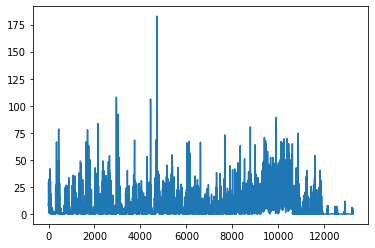

In [8]:
train_data['rain_sum (mm)'].plot()

In [9]:
train_hourly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318192 entries, 0 to 318191
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   time                                318192 non-null  object 
 1   temperature_2m (°C)                 318022 non-null  float64
 2   relativehumidity_2m (%)             318022 non-null  float64
 3   dewpoint_2m (°C)                    318022 non-null  float64
 4   apparent_temperature (°C)           318022 non-null  float64
 5   pressure_msl (hPa)                  318022 non-null  float64
 6   surface_pressure (hPa)              318022 non-null  float64
 7   snowfall (cm)                       318022 non-null  float64
 8   cloudcover (%)                      318022 non-null  float64
 9   cloudcover_low (%)                  318022 non-null  float64
 10  cloudcover_mid (%)                  318022 non-null  float64
 11  cloudcover_high (%)       

In [10]:
train_hourly_data.describe()

,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),snowfall (cm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),...,et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³)
count,318022.000000,318022.000000,318022.000000,318022.000000,318022.000000,318022.000000,318022.000000,318022.000000,318022.000000,318022.000000,...,318022.000000,318022.000000,318022.000000,318022.000000,318022.000000,318022.000000,318022.000000,318022.000000,318022.000000,318022.000000
mean,19.233679,82.932319,16.120571,22.651936,1011.750079,960.336812,0.003651,57.211454,28.164819,31.059854,...,0.137702,0.447228,19.799533,19.693870,19.606782,19.527533,0.291988,0.296751,0.296764,0.325650
std,12.766816,13.451436,13.362998,16.119087,4.898858,81.407759,0.030587,31.152322,29.250489,31.698668,...,0.195488,0.484829,12.363233,12.090034,11.972685,11.903481,0.127443,0.121373,0.115953,0.104594
min,-34.800000,21.000000,-45.200000,-38.200000,963.600000,737.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-25.600000,-25.200000,-24.300000,-23.000000,0.014000,0.034000,0.035000,0.073000
25%,14.700000,76.000000,13.000000,16.100000,1009.400000,973.000000,0.000000,33.000000,5.000000,5.000000,...,0.000000,0.110000,17.600000,17.000000,16.600000,16.400000,0.191000,0.226000,0.246000,0.253000
50%,25.000000,87.000000,22.700000,30.300000,1011.300000,990.700000,0.000000,56.000000,17.000000,20.000000,...,0.030000,0.300000,24.600000,24.900000,24.800000,24.800000,0.334000,0.330000,0.326000,0.356000
75%,27.200000,93.000000,24.300000,33.200000,1013.800000,1010.000000,0.000000,87.000000,42.000000,49.000000,...,0.230000,0.610000,27.200000,27.000000,27.000000,27.000000,0.395000,0.394000,0.389000,0.404000
max,36.900000,100.000000,29.600000,46.200000,1057.000000,1032.200000,2.100000,100.000000,100.000000,100.000000,...,1.010000,4.670000,46.900000,35.100000,32.700000,31.600000,0.462000,0.462000,0.462000,0.461000


In [11]:
train_hourly_data.describe(include='object')

,time,city
count,318192,318192
unique,34032,10
top,2020-06-21T02:00,b
freq,10,32280


In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4972 entries, 0 to 4971
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               4972 non-null   int64  
 1   time                             4972 non-null   object 
 2   temperature_2m_max (°C)          4972 non-null   float64
 3   temperature_2m_min (°C)          4972 non-null   float64
 4   apparent_temperature_max (°C)    4972 non-null   float64
 5   apparent_temperature_min (°C)    4972 non-null   float64
 6   sunrise (iso8601)                4972 non-null   object 
 7   sunset (iso8601)                 4972 non-null   object 
 8   shortwave_radiation_sum (MJ/m²)  4972 non-null   float64
 9   snowfall_sum (cm)                4972 non-null   float64
 10  windspeed_10m_max (km/h)         4972 non-null   float64
 11  windgusts_10m_max (km/h)         4972 non-null   float64
 12  winddirection_10m_do

In [13]:
test_hourly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119328 entries, 0 to 119327
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   time                                119328 non-null  object 
 1   temperature_2m (°C)                 119328 non-null  float64
 2   relativehumidity_2m (%)             119328 non-null  float64
 3   dewpoint_2m (°C)                    119328 non-null  float64
 4   apparent_temperature (°C)           119328 non-null  float64
 5   pressure_msl (hPa)                  119328 non-null  float64
 6   surface_pressure (hPa)              119328 non-null  float64
 7   snowfall (cm)                       119328 non-null  float64
 8   cloudcover (%)                      119328 non-null  float64
 9   cloudcover_low (%)                  119328 non-null  float64
 10  cloudcover_mid (%)                  119328 non-null  float64
 11  cloudcover_high (%)       

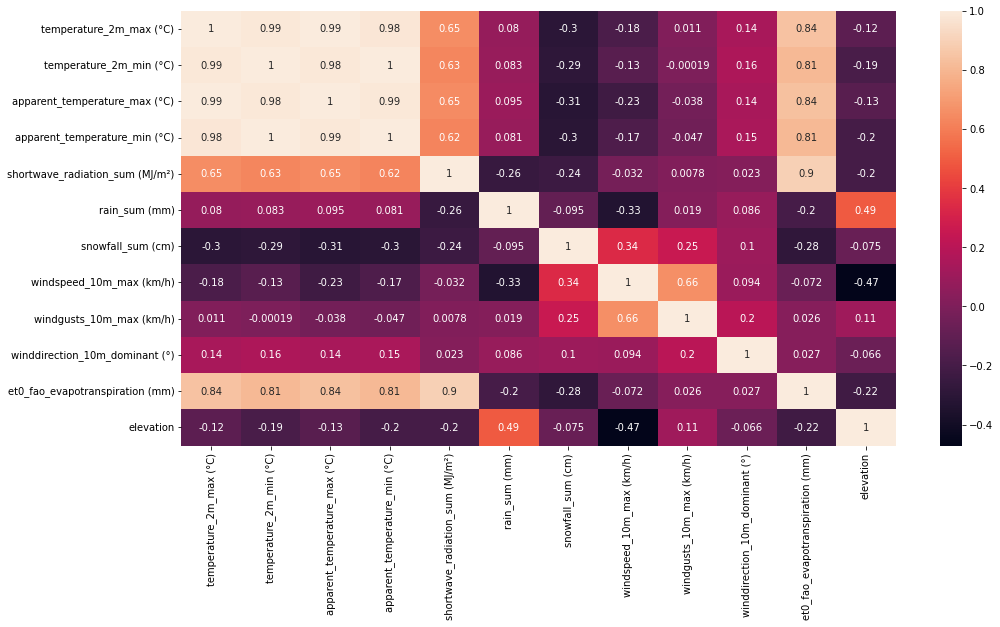

In [14]:
corr = train_data.corr()
plt.figure(figsize=(16,8))
heatmap = sns.heatmap(corr, annot=True)

## Preprocessing

In [15]:
train_clean = train_data.dropna(subset = ['rain_sum (mm)'])
train_clean = train_clean.dropna()

train_hourly_clean = train_hourly_data.dropna()

In [16]:
test_clean = test_data.drop('id', axis=1)
test_hourly_clean = test_hourly_data.dropna()

## Feature Engineering

In [17]:
train_hourly_clean['date'] = train_hourly_clean.apply(lambda row: row.time.split('T')[0], axis = 1)
train_mean_hourly = train_hourly_clean.groupby(['date','city']).mean().reset_index().rename(columns = {'date' : 'time'})

X = pd.merge(train_clean, train_mean_hourly, how='left', on = ['time','city'], suffixes = ['_d','_h'] )
# print
train_mean_hourly

c:\Users\KEY\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,time,city,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),snowfall (cm),cloudcover (%),...,et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³)
0,2018-01-01,b,17.825000,98.708333,17.587500,21.050000,1011.916667,878.941667,0.000000,92.125000,...,0.046667,0.029583,18.637500,18.925000,19.479167,19.887500,0.425500,0.426708,0.399458,0.432042
1,2018-01-01,le,27.887500,84.416667,24.854167,34.670833,1007.008333,989.833333,0.000000,37.750000,...,0.205417,0.655417,24.850000,24.445833,24.100000,24.200000,0.418417,0.426208,0.401542,0.446000
2,2018-01-01,lh,24.591667,91.208333,23.029167,30.945833,1008.841667,1010.541667,0.000000,91.500000,...,0.092500,0.284167,24.945833,25.395833,25.800000,26.300000,0.450083,0.444917,0.442000,0.446000
3,2018-01-01,p,27.004167,84.750000,24.179167,32.583333,1006.820833,1006.320833,0.000000,67.416667,...,0.130417,0.560000,27.737500,27.270833,27.300000,27.100000,0.398958,0.403083,0.386292,0.390708
4,2018-01-01,q,-21.616667,64.916667,-26.445833,-24.341667,1011.504167,972.404167,0.023333,91.000000,...,0.001667,0.037917,-13.033333,-12.725000,-11.470833,-8.829167,0.334000,0.324000,0.267000,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13253,2022-12-28,sa,-2.857143,97.714286,-3.157143,-3.042857,1020.185714,1015.485714,0.020000,90.714286,...,0.001429,0.011429,-0.100000,0.300000,2.600000,8.900000,0.375286,0.381286,0.394000,0.396000
13254,2022-12-28,si,25.428571,89.857143,23.642857,32.771429,1010.414286,987.242857,0.000000,40.857143,...,0.004286,0.328571,24.085714,25.057143,25.900000,26.300000,0.291143,0.299286,0.319286,0.311000
13255,2022-12-28,su,24.428571,91.571429,22.957143,30.371429,1009.700000,1012.000000,0.000000,38.142857,...,0.011429,0.261429,24.971429,26.271429,28.000000,28.800000,0.281000,0.286714,0.275000,0.298000
13256,2022-12-28,t,13.442857,87.000000,11.342857,13.485714,1016.214286,744.357143,0.000000,100.000000,...,0.028571,0.198571,14.728571,15.671429,16.300000,16.300000,0.348571,0.358571,0.344571,0.345000


In [18]:
test_hourly_clean['date'] = test_hourly_clean.apply(lambda row: row.time.split('T')[0], axis = 1)
test_mean_hourly = test_hourly_clean.groupby(['date','city']).mean().reset_index().rename(columns = {'date' : 'time'})

test = pd.merge(test_clean, test_mean_hourly, how='left', on = ['time','city'], suffixes = ['_d','_h'] )
# print
test_mean_hourly

c:\Users\KEY\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,time,city,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),snowfall (cm),cloudcover (%),...,et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³)
0,2021-08-02,b,19.758333,84.750000,16.983333,21.091667,1014.216667,881.316667,0.000000,59.541667,...,0.135417,0.387917,20.608333,20.487500,20.400000,20.200000,0.355375,0.327583,0.336417,0.409958
1,2021-08-02,le,27.425000,84.541667,24.429167,33.145833,1011.500000,994.208333,0.000000,26.708333,...,0.168333,0.617083,23.825000,23.804167,23.604167,23.700000,0.402625,0.379458,0.375417,0.431000
2,2021-08-02,lh,26.262500,87.166667,23.858333,34.062500,1009.929167,1011.629167,0.000000,42.500000,...,0.175000,0.474167,26.845833,26.962500,27.000000,26.700000,0.413542,0.396958,0.388542,0.428542
3,2021-08-02,p,26.741667,86.750000,24.279167,31.645833,1010.679167,1010.179167,0.000000,38.625000,...,0.145833,0.483750,27.287500,26.920833,26.900000,26.900000,0.358792,0.352792,0.362042,0.389625
4,2021-08-02,sa,25.733333,81.875000,22.300000,29.408333,1007.170833,1002.929167,0.000000,48.208333,...,0.134167,0.643333,26.279167,25.137500,21.325000,14.191667,0.188417,0.171750,0.255000,0.375333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4967,2022-12-22,sa,-2.412500,85.458333,-4.558333,-5.220833,999.345833,994.729167,0.291667,66.791667,...,0.025833,0.078750,-0.758333,0.087500,2.920833,9.737500,0.386042,0.383167,0.396708,0.396000
4968,2022-12-22,si,26.475000,87.916667,24.241667,32.841667,1006.004167,982.970833,0.000000,87.583333,...,0.137917,0.438750,26.062500,26.454167,26.600000,26.300000,0.293792,0.274542,0.293875,0.304000
4969,2022-12-22,su,26.825000,84.666667,23.975000,32.308333,1005.320833,1007.620833,0.000000,69.958333,...,0.137083,0.557917,28.070833,28.637500,29.016667,28.900000,0.302458,0.304250,0.280875,0.299583
4970,2022-12-22,t,13.854167,90.333333,12.245833,15.441667,1013.016667,743.020833,0.000000,87.916667,...,0.125000,0.162500,16.800000,16.483333,16.237500,16.300000,0.335958,0.342583,0.336083,0.341000


In [19]:
X.describe(include='object')

,time,sunrise (iso8601),sunset (iso8601),city
count,12792,12792,12792,12792
unique,1309,11305,11351,10
top,2019-07-02,1970-01-01T07:00,1970-01-01T07:00,sa
freq,10,841,841,1308


In [20]:
X['year'] = X.apply(lambda row: float(row.time.split('-')[0]), axis=1)
X['moon'] = X.apply(lambda row: float(row.time.split('-')[1]), axis=1)
X['date'] = X.apply(lambda row: float(row.time.split('-')[2]), axis=1)
        
X['hour_sunrise'] = X.apply(lambda row: float(row['sunrise (iso8601)'].split('T')[1].split(':')[0]), axis=1)
X['minute_sunrise'] = X.apply(lambda row: float(row['sunrise (iso8601)'].split('T')[1].split(':')[1]), axis=1)
X['hour_sunset'] = X.apply(lambda row: float(row['sunset (iso8601)'].split('T')[1].split(':')[0]), axis=1)
X['minute_sunset'] = X.apply(lambda row: float(row['sunset (iso8601)'].split('T')[1].split(':')[1]), axis=1)

# print
X

,time,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),sunrise (iso8601),sunset (iso8601),shortwave_radiation_sum (MJ/m²),rain_sum (mm),snowfall_sum (cm),...,soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),year,moon,date,hour_sunrise,minute_sunrise,hour_sunset,minute_sunset
0,2018-01-01,29.9,26.0,36.3,31.6,2018-01-01T05:15,2018-01-01T17:49,17.59,7.7,0.0,...,0.300292,0.282667,0.280000,2018.0,1.0,1.0,5.0,15.0,17.0,49.0
1,2018-01-02,30.6,25.7,37.7,31.2,2018-01-02T05:15,2018-01-02T17:50,19.87,9.4,0.0,...,0.312250,0.287125,0.280000,2018.0,1.0,2.0,5.0,15.0,17.0,50.0
2,2018-01-03,31.8,25.9,40.3,31.7,2018-01-03T05:16,2018-01-03T17:50,20.44,7.8,0.0,...,0.304750,0.291792,0.280500,2018.0,1.0,3.0,5.0,16.0,17.0,50.0
3,2018-01-04,30.8,26.0,39.1,31.6,2018-01-04T05:16,2018-01-04T17:50,20.44,29.7,0.0,...,0.317625,0.295083,0.281042,2018.0,1.0,4.0,5.0,16.0,17.0,50.0
4,2018-01-05,30.9,25.2,37.6,29.9,2018-01-05T05:17,2018-01-05T17:51,20.10,22.5,0.0,...,0.337000,0.314375,0.282792,2018.0,1.0,5.0,5.0,17.0,17.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12787,2021-07-28,9.3,5.4,5.1,1.8,1970-01-01T07:00,1970-01-01T07:00,13.87,5.0,0.0,...,0.203000,0.247167,0.253000,2021.0,7.0,28.0,7.0,0.0,7.0,0.0
12788,2021-07-29,9.5,6.9,5.2,3.0,1970-01-01T07:00,1970-01-01T07:00,8.00,0.4,0.0,...,0.203000,0.247000,0.253000,2021.0,7.0,29.0,7.0,0.0,7.0,0.0
12789,2021-07-30,6.8,5.0,3.0,1.1,1970-01-01T07:00,1970-01-01T07:00,8.14,2.8,0.0,...,0.203000,0.247000,0.253000,2021.0,7.0,30.0,7.0,0.0,7.0,0.0
12790,2021-07-31,6.0,3.7,2.9,0.7,1970-01-01T07:00,1970-01-01T07:00,9.30,2.1,0.0,...,0.203000,0.247000,0.253000,2021.0,7.0,31.0,7.0,0.0,7.0,0.0


In [21]:
test['year'] = test.apply(lambda row: float(row.time.split('-')[0]), axis=1)
test['moon'] = test.apply(lambda row: float(row.time.split('-')[1]), axis=1)
test['date'] = test.apply(lambda row: float(row.time.split('-')[2]), axis=1)
        
test['hour_sunrise'] = test.apply(lambda row: float(row['sunrise (iso8601)'].split('T')[1].split(':')[0]), axis=1)
test['minute_sunrise'] = test.apply(lambda row: float(row['sunrise (iso8601)'].split('T')[1].split(':')[1]), axis=1)
test['hour_sunset'] = test.apply(lambda row: float(row['sunset (iso8601)'].split('T')[1].split(':')[0]), axis=1)
test['minute_sunset'] = test.apply(lambda row: float(row['sunset (iso8601)'].split('T')[1].split(':')[1]), axis=1)

# print
test

,time,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),sunrise (iso8601),sunset (iso8601),shortwave_radiation_sum (MJ/m²),snowfall_sum (cm),windspeed_10m_max (km/h),...,soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),year,moon,date,hour_sunrise,minute_sunrise,hour_sunset,minute_sunset
0,2021-08-02,32.3,25.3,38.2,29.6,2021-08-02T05:39,2021-08-02T17:30,20.79,0.00,7.6,...,0.077500,0.112500,0.234000,2021.0,8.0,2.0,5.0,39.0,17.0,30.0
1,2021-08-03,31.7,25.5,37.4,30.3,2021-08-03T05:39,2021-08-03T17:30,20.01,0.00,10.2,...,0.076042,0.111583,0.233292,2021.0,8.0,3.0,5.0,39.0,17.0,30.0
2,2021-08-04,32.6,25.7,37.1,30.8,2021-08-04T05:39,2021-08-04T17:30,20.89,0.00,17.3,...,0.074542,0.110917,0.233000,2021.0,8.0,4.0,5.0,39.0,17.0,30.0
3,2021-08-05,32.0,25.7,36.8,31.1,2021-08-05T05:39,2021-08-05T17:30,22.19,0.00,15.8,...,0.073500,0.110375,0.232458,2021.0,8.0,5.0,5.0,39.0,17.0,30.0
4,2021-08-06,31.9,26.3,36.0,31.6,2021-08-06T05:38,2021-08-06T17:30,21.84,0.00,20.2,...,0.072417,0.109458,0.232000,2021.0,8.0,6.0,5.0,38.0,17.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4967,2022-12-18,-6.9,-13.1,-13.5,-19.5,1970-01-01T07:00,1970-01-01T07:00,0.00,1.12,21.7,...,0.205000,0.237000,0.252000,2022.0,12.0,18.0,7.0,0.0,7.0,0.0
4968,2022-12-19,-2.5,-6.8,-7.1,-13.4,1970-01-01T07:00,1970-01-01T07:00,0.00,1.40,21.6,...,0.205000,0.237000,0.252000,2022.0,12.0,19.0,7.0,0.0,7.0,0.0
4969,2022-12-20,-4.6,-16.9,-9.0,-21.9,1970-01-01T07:00,1970-01-01T07:00,0.00,1.05,14.1,...,0.205000,0.237000,0.252000,2022.0,12.0,20.0,7.0,0.0,7.0,0.0
4970,2022-12-21,-17.2,-21.2,-22.2,-26.5,1970-01-01T07:00,1970-01-01T07:00,0.00,0.00,10.8,...,0.205000,0.237000,0.252000,2022.0,12.0,21.0,7.0,0.0,7.0,0.0


In [22]:
from sklearn.preprocessing import OneHotEncoder

OH_encoderCity = OneHotEncoder(handle_unknown='ignore', sparse=False)
encode_city_train = pd.DataFrame(OH_encoderCity.fit_transform(X[['city']])).add_prefix('city_')
encode_city_train.index = X.index
X = pd.concat([X, encode_city_train], axis=1)

# OH_encodermoon = OneHotEncoder(handle_unknown='ignore', sparse=False)
# encode_moon_train = pd.DataFrame(OH_encodermoon.fit_transform(X[['moon']])).add_prefix('moon_')
# encode_moon_train.index = X.index
# X = pd.concat([X, encode_moon_train], axis=1)
# X.drop('moon',axis=1)

# print
X

,time,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),sunrise (iso8601),sunset (iso8601),shortwave_radiation_sum (MJ/m²),rain_sum (mm),snowfall_sum (cm),...,city_0,city_1,city_2,city_3,city_4,city_5,city_6,city_7,city_8,city_9
0,2018-01-01,29.9,26.0,36.3,31.6,2018-01-01T05:15,2018-01-01T17:49,17.59,7.7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2018-01-02,30.6,25.7,37.7,31.2,2018-01-02T05:15,2018-01-02T17:50,19.87,9.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2018-01-03,31.8,25.9,40.3,31.7,2018-01-03T05:16,2018-01-03T17:50,20.44,7.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2018-01-04,30.8,26.0,39.1,31.6,2018-01-04T05:16,2018-01-04T17:50,20.44,29.7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2018-01-05,30.9,25.2,37.6,29.9,2018-01-05T05:17,2018-01-05T17:51,20.10,22.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12787,2021-07-28,9.3,5.4,5.1,1.8,1970-01-01T07:00,1970-01-01T07:00,13.87,5.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12788,2021-07-29,9.5,6.9,5.2,3.0,1970-01-01T07:00,1970-01-01T07:00,8.00,0.4,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12789,2021-07-30,6.8,5.0,3.0,1.1,1970-01-01T07:00,1970-01-01T07:00,8.14,2.8,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12790,2021-07-31,6.0,3.7,2.9,0.7,1970-01-01T07:00,1970-01-01T07:00,9.30,2.1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [23]:
encode_city_train = pd.DataFrame(OH_encoderCity.transform(test[['city']])).add_prefix('city_')
encode_city_train.index = test.index
test = pd.concat([test, encode_city_train], axis=1)

# encode_moon_train = pd.DataFrame(OH_encodermoon.transform(test[['moon']])).add_prefix('moon_')
# encode_moon_train.index = test.index
# test = pd.concat([test, encode_moon_train], axis=1)
# test.drop('moon',axis=1)

# print
test

,time,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),sunrise (iso8601),sunset (iso8601),shortwave_radiation_sum (MJ/m²),snowfall_sum (cm),windspeed_10m_max (km/h),...,city_0,city_1,city_2,city_3,city_4,city_5,city_6,city_7,city_8,city_9
0,2021-08-02,32.3,25.3,38.2,29.6,2021-08-02T05:39,2021-08-02T17:30,20.79,0.00,7.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2021-08-03,31.7,25.5,37.4,30.3,2021-08-03T05:39,2021-08-03T17:30,20.01,0.00,10.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2021-08-04,32.6,25.7,37.1,30.8,2021-08-04T05:39,2021-08-04T17:30,20.89,0.00,17.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2021-08-05,32.0,25.7,36.8,31.1,2021-08-05T05:39,2021-08-05T17:30,22.19,0.00,15.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2021-08-06,31.9,26.3,36.0,31.6,2021-08-06T05:38,2021-08-06T17:30,21.84,0.00,20.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4967,2022-12-18,-6.9,-13.1,-13.5,-19.5,1970-01-01T07:00,1970-01-01T07:00,0.00,1.12,21.7,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4968,2022-12-19,-2.5,-6.8,-7.1,-13.4,1970-01-01T07:00,1970-01-01T07:00,0.00,1.40,21.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4969,2022-12-20,-4.6,-16.9,-9.0,-21.9,1970-01-01T07:00,1970-01-01T07:00,0.00,1.05,14.1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4970,2022-12-21,-17.2,-21.2,-22.2,-26.5,1970-01-01T07:00,1970-01-01T07:00,0.00,0.00,10.8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# corr = X.corr()
# plt.figure(figsize=(63,63))
# heatmap = sns.heatmap(corr, annot=True)

In [25]:
from sklearn.feature_selection import SelectKBest

Y = X[['rain_sum (mm)']]
X = X.select_dtypes(exclude='object').drop(['rain_sum (mm)'], axis=1)

best_features= SelectKBest(k=45)
fit = best_features.fit(X,Y)

df_scores= pd.DataFrame(fit.scores_)
df_columns= pd.DataFrame(X.columns)

features_scores= pd.concat([df_columns, df_scores], axis=1)
features_scores.columns= ['Features', 'Score']
features_scores.sort_values(by = 'Score').head(100)

c:\Users\KEY\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Features,Score
55,city_7,0.760210
5,snowfall_sum (cm),0.782587
17,snowfall (cm),0.782630
49,city_1,0.906970
7,windgusts_10m_max (km/h),0.910274
57,city_9,0.963733
43,date,0.984772
41,year,0.994810
42,moon,1.317200
54,city_6,1.388799


In [26]:
test = test.select_dtypes(exclude='object')

In [27]:
X = pd.DataFrame(fit.transform(X))
test = pd.DataFrame(fit.transform(test))
# print
X

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,29.9,26.0,36.3,31.6,17.59,6.9,277.0,3.61,0.0,26.404167,...,0.280000,5.0,15.0,17.0,49.0,0.0,0.0,0.0,0.0,0.0
1,30.6,25.7,37.7,31.2,19.87,7.1,168.0,4.11,0.0,26.466667,...,0.280000,5.0,15.0,17.0,50.0,0.0,0.0,0.0,0.0,0.0
2,31.8,25.9,40.3,31.7,20.44,8.1,125.0,4.23,0.0,27.145833,...,0.280500,5.0,16.0,17.0,50.0,0.0,0.0,0.0,0.0,0.0
3,30.8,26.0,39.1,31.6,20.44,7.2,190.0,4.22,0.0,26.570833,...,0.281042,5.0,16.0,17.0,50.0,0.0,0.0,0.0,0.0,0.0
4,30.9,25.2,37.6,29.9,20.10,6.9,241.0,4.16,0.0,26.645833,...,0.282792,5.0,17.0,17.0,51.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12787,9.3,5.4,5.1,1.8,13.87,20.2,54.0,1.74,0.0,10.679167,...,0.253000,7.0,0.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0
12788,9.5,6.9,5.2,3.0,8.00,21.8,67.0,1.66,0.0,11.437500,...,0.253000,7.0,0.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0
12789,6.8,5.0,3.0,1.1,8.14,16.1,54.0,1.26,0.0,7.750000,...,0.253000,7.0,0.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0
12790,6.0,3.7,2.9,0.7,9.30,16.1,352.0,1.20,0.0,7.133333,...,0.253000,7.0,0.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0


## Model

In [28]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=4)

model = XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
model.fit(X_train,y_train)

def mines(x):
    if x < 0:
        return 0
    return x

predictions = pd.Series(model.predict(X_test)).apply(mines)
predictions = pd.DataFrame(predictions)
predictions.describe()

,0
count,3838.000000
mean,6.282321
std,7.978129
min,0.000000
25%,0.331227
50%,3.028952
75%,9.571993
max,61.664669


## Validating

In [29]:
from sklearn.metrics import mean_squared_error

print('Error MSE:',mean_squared_error(predictions, y_test))

Error MSE: 27.732978900940054


# Test Data

In [30]:
model = XGBRegressor()
model.fit(X,Y)

predictions = pd.Series(model.predict(test)).apply(mines)

output = pd.DataFrame({'id': test_data.id,
                        'rain_sum (mm)': predictions})
output.to_csv('submission-23-key.csv', index=False)

In [31]:
predictions.describe()

count    4972.000000
mean        7.119823
std         8.474835
min         0.000000
25%         0.736963
50%         4.178830
75%        10.527704
max        80.797997
dtype: float64